# Analysing marketing campaign 

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import ttest_ind
import plotly
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [48]:
marketing= pd.read_csv('marketing.csv',parse_dates=['date_served','date_subscribed','date_canceled'])

In [26]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True


In [27]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
dtypes: datetime64[ns](3), object(9)
memory usage: 941.1+ KB


In [49]:
marketing.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,2018-01-15 00:00:00,House Ads,control,False,English,English,19-24 years,2018-01-16 00:00:00,2018-04-02 00:00:00,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279
first,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 00:00:00,2018-01-05 00:00:00,NaN,NaN
last,NaN,2018-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-31 00:00:00,2018-05-09 00:00:00,NaN,NaN


In [50]:
marketing.is_retained.value_counts()
marketing.converted.value_counts()
print(list(marketing.is_retained.unique()))

[True, False, nan]


In [52]:
# Convert is_retained  and converted to boolean
marketing.is_retained.replace({'True': True, 'False': False}, inplace=True)
marketing.converted.replace({'True': True, 'False': False}, inplace=True)
#marketing['is_retained'] = marketing['is_retained'].astype('bool')
#marketing['converted']=marketing['converted'].astype('bool')
# Check the data type of is_retained, again
print(marketing['is_retained'].dtype)
print(marketing.converted.dtype)
print(marketing.is_retained.value_counts())

object
object
True     1279
False     577
Name: is_retained, dtype: int64


In [53]:
channel_list=list(marketing['subscribing_channel'].unique())
print(channel_list)

['House Ads', 'Email', 'Push', 'Facebook', 'Instagram', nan]


In [54]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

In [55]:
marketing.channel_code.unique()

array([ 1.,  4.,  5.,  3.,  2., nan])

In [56]:
# Add the new column is_correct_lang where laanguage displayed is laguage preferred
marketing['is_correct_lang'] = np.where(marketing.language_displayed==marketing.language_preferred,'Yes','No')
marketing.is_correct_lang.value_counts()

Yes    9515
No      522
Name: is_correct_lang, dtype: int64

**is_correct_lang**: conveys whether the ad was shown to the user in their preferred language

In [57]:
# Add a DoW column
marketing['DoW'] = marketing.date_subscribed.dt.dayofweek

**day_of_week**: represents the day of the week as an integer (we added a new column, day that represents the day of the week and defined a dictionary that maps the day of the week to each numerical value from 0 to 6 for this purpose.)

#### Daily marketing reach by channel

In [58]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

# Print head of daily_users
print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


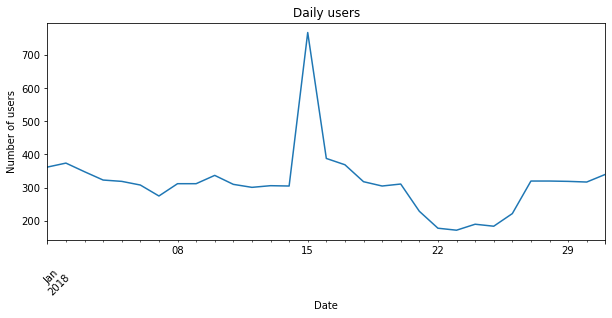

In [59]:
# Plot daily_subscribers
plt.figure(figsize=(10,4))
daily_users.plot()

# Include a title and y-axis label
plt.title('Daily users')
plt.xlabel('Date')
plt.ylabel('Number of users')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()

There is **sudden spike** in the number of users in the middle of the month. reason not yet known

#### Calculating conversion rate

**conversion rate**= _Number of people who subscribed / Number of people who were marketed to_


In [60]:
# Calculate the number of people we marketed to
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing['converted']==True]['user_id'].nunique()

# Calculate the conversion rate
conversion_rate = subscribers/total
print(round(conversion_rate*100, 2), "%")

13.89 %


**Calculating retention rate**

**Retention Rate** = _Number of people who remained subscribed / Total number of people who converted_

In [61]:
# Calculate the number of subscribers
total_subscribers = marketing[marketing['converted']==True]['user_id'].nunique()

# Calculate the number of people who remained subscribed
retained = marketing[marketing['is_retained']==True]['user_id'].nunique()

# Calculate the retention rate
retention_rate = retained/total_subscribers
print(round(retention_rate*100, 2), "%")

66.8 %


#### Customer segmentation

In [65]:
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of English speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of English speakers who converted
subscribers = english_speakers[english_speakers['converted']==True]['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:', round(conversion_rate*100,2), '%')

English speaker conversion rate: 12.92 %


language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


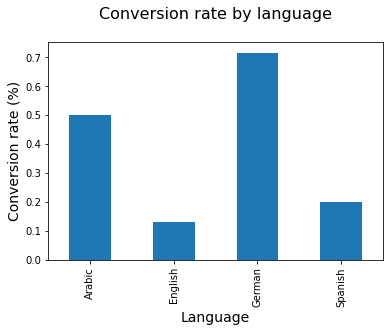

In [72]:
# Group by language_displayed and count unique users
total = marketing.groupby('language_displayed')['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted']==True].groupby('language_displayed')['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total
print(language_conversion_rate)

# Create a bar chart using channel retention DataFrame
language_conversion_rate.plot(kind = 'bar')
# Add a title and x and y-axis labels
plt.title('Conversion rate by language\n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)
# Display the plot
plt.show()

**You'll notice the conversion rate is much lower for English and Spanish.**

* The marketing team wants to know whether there is any difference in the conversion rate based on when in the month, your users saw an ad

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


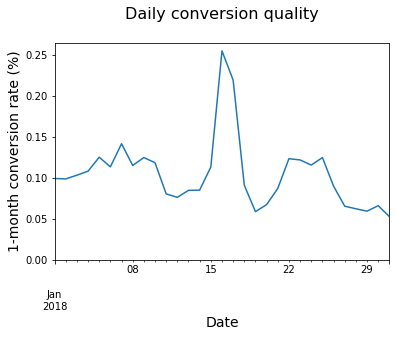

In [80]:
# Group by date_served and count unique users
total = marketing.groupby('date_served')['user_id'].nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing['converted']==True].groupby('date_served')['user_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
print(daily_conversion_rate)

daily_conversion_rate.plot()
# Add a title and x and y-axis labels
plt.title('Daily conversion quality\n', size = 16)
plt.ylabel('1-month conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)
# Set the y-axis to begin at 0
plt.ylim(0)
# Display the plot
plt.show()

Looking at the daily conversion rate is crucial to contextualize whether the conversion rate on a particular day was good or bad. Additionally, looking at conversion rate over time can help to surface trends such as a conversion rate that appears to be going down over time. These kinds of trends are crucial to identify for your marketing stakeholders as early as possible.

In [68]:
# Subset to include only House Ads
house_ads = marketing\
[marketing['subscribing_channel'] == 'House Ads']
retained = house_ads[house_ads['is_retained'] == True]\
['user_id'].nunique()
subscribers = house_ads[house_ads['converted'] == True]\
['user_id'].nunique()
retention_rate = retained/subscribers
print(round(retention_rate*100,2), '%')

58.05 %


In [69]:
# Group by subscribing_channel and calculate retention
retained = marketing[marketing['is_retained'] == True]\
.groupby(['subscribing_channel'])\
['user_id'].nunique()
print(retained)

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64


In [70]:
# Group by subscribing_channel and calculate subscribers
subscribers = marketing[marketing['converted'] == True]\
.groupby(['subscribing_channel'])\
['user_id'].nunique()
print(subscribers)

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64


In [71]:
# Calculate the retention rate across the DataFrame
channel_retention_rate = (retained/subscribers)*100
print(channel_retention_rate)

subscribing_channel
Email        87.577640
Facebook     68.778281
House Ads    58.053691
Instagram    68.103448
Push         70.129870
Name: user_id, dtype: float64


**Retention rate is highest through email**

**Analyzing subcribers quality**

In [73]:
# Group by language_displayed and count unique users
total = marketing.groupby(['date_subscribed'])['user_id']\
.nunique()
# Group by language_displayed and sum conversions
retained = marketing[marketing['is_retained'] == True]\
.groupby(['date_subscribed'])\
['user_id'].nunique()
# Calculate subscriber quality across dates
daily_retention_rate = retained/total

In [76]:
# Reset index to turn the Series into a DataFrame
daily_retention_rate =pd.DataFrame(daily_retention_rate.reset_index())
# Rename columns
daily_retention_rate.columns = ['date_subscribed',
'retention_rate']

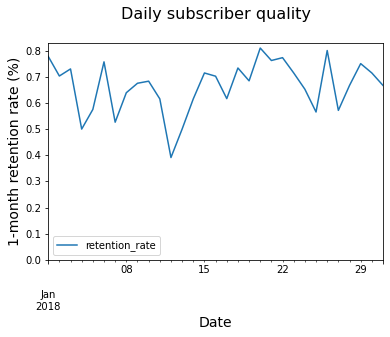

In [78]:
# Create a line chart using the daily_retention DataFrame
daily_retention_rate.plot('date_subscribed',
'retention_rate')
# Add a title and x and y-axis labels
plt.title('Daily subscriber quality\n', size = 16)
plt.ylabel('1-month retention rate (%)', size = 14)
plt.xlabel('Date', size = 14)
# Set the y-axis to begin at 0
plt.ylim(0)
# Display the plot
plt.show()

In [81]:
language = marketing.groupby(['date_served',
'language_preferred'])\
['user_id'].count()
print(language.head())

date_served  language_preferred
2018-01-01   Arabic                  4
             English               355
             German                  5
             Spanish                11
2018-01-02   Arabic                  4
Name: user_id, dtype: int64


In [82]:
language = pd.DataFrame(language.unstack(level=1))
print(language.head())

language_preferred  Arabic  English  German  Spanish
date_served                                         
2018-01-01             4.0    355.0     5.0     11.0
2018-01-02             4.0    397.0     6.0     10.0
2018-01-03             3.0    374.0     3.0      8.0
2018-01-04             2.0    318.0     2.0     14.0
2018-01-05             1.0    314.0     2.0     14.0


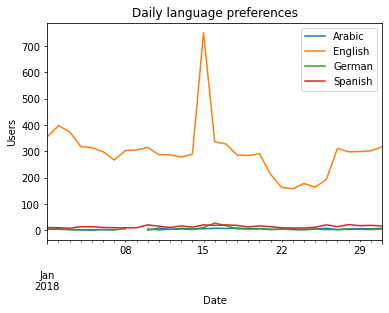

In [83]:
#Plotting preferred language over time
language.plot()
plt.title('Daily language preferences')
plt.xlabel('Date')
plt.ylabel('Users')
plt.legend(loc = 'upper right',
labels = language.columns.values)
plt.show()

In [84]:
# Create DataFrame grouped by age and language preference
language_age = marketing.groupby(['language_preferred',
'age_group'])\
['user_id'].count()
language_age = pd.DataFrame(language_age.unstack(level=1))
print(language_age.head())

age_group           0-18 years  19-24 years  24-30 years  30-36 years  \
language_preferred                                                      
Arabic                      19           26           19           19   
English                   1421         1560         1442         1251   
German                      31           29           35           16   
Spanish                     68           67           72           69   

age_group           36-45 years  45-55 years  55+ years  
language_preferred                                       
Arabic                       19           21         22  
English                    1260         1240       1101  
German                       19           25         12  
Spanish                      55           67         52  


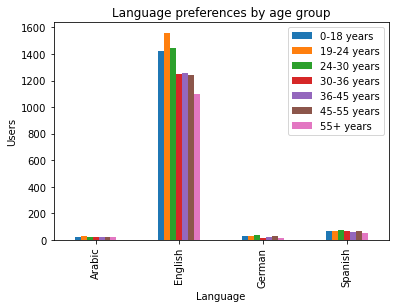

In [85]:
#Plotting language preferences by age group
language_age.plot(kind='bar')
plt.title('Language preferences by age group')
plt.xlabel('Language')
plt.ylabel('Users')
plt.legend(loc = 'upper right',
labels = language_age.columns.values)
plt.show()

**Marketing channels by age group**

In [97]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].nunique()
channel_age.head()

marketing_channel  age_group  
Email              0-18 years      91
                   19-24 years    107
                   24-30 years    116
                   30-36 years     60
                   36-45 years     63
Name: user_id, dtype: int64

In [98]:
channel_age= pd.DataFrame(channel_age.unstack(level=1))
channel_age.head()

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
marketing_channel,,,,,,,
Email,91,107,116,60,63,64,53
Facebook,256,331,289,238,217,289,175
House Ads,585,643,587,600,505,567,538
Instagram,292,301,268,252,268,218,199
Push,184,144,180,83,192,82,117


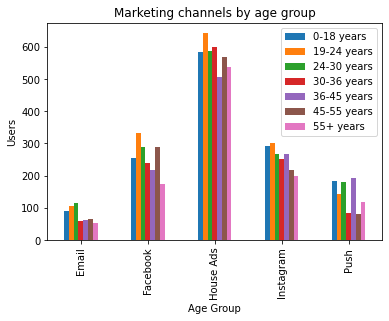

In [100]:
channel_age.plot(kind='bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
plt.legend(loc = 'upper right',
labels = channel_age.columns.values)
plt.show()

As you can see, email is not reaching older age groups, and Facebook is not reaching many people under 18.

##### It's important to identify how each marketing channel is performing because this will affect company strategy going forward. If one channel is outperforming others, it might signal the channel merits further investment.

In [101]:
# Count the subs by subscribing channel and day
retention_total = marketing.groupby(['date_subscribed',
                                     'subscribing_channel'])['user_id'].nunique()

# Print results
print(retention_total.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64


In [102]:
# Sum the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing['is_retained']==True].groupby(['date_subscribed', 
                                       'subscribing_channel'])['user_id'].nunique()

# Print results
print(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


<Figure size 360x288 with 0 Axes>

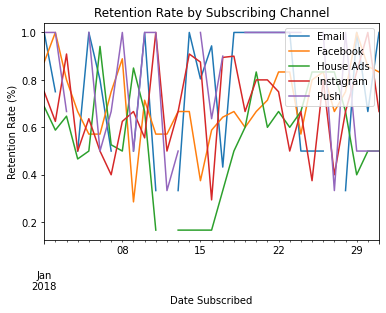

In [110]:
#Analyzing retention rates for the campaign
retention_rate=retention_subs/retention_total
retention_rate_df=pd.DataFrame(retention_rate.unstack(level=1))
plt.figure(figsize=(5,4))
retention_rate_df.plot()
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc='upper right', labels=retention_rate_df.columns.values)
plt.show()

In [113]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()  
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate


def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index,dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        plt.xticks(rotation=45)
        # Show plot
        plt.show()  
        plt.clf()

daily conversion rate for each age group

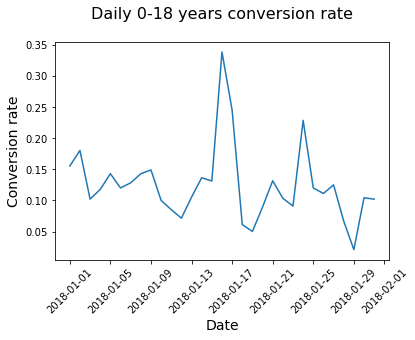

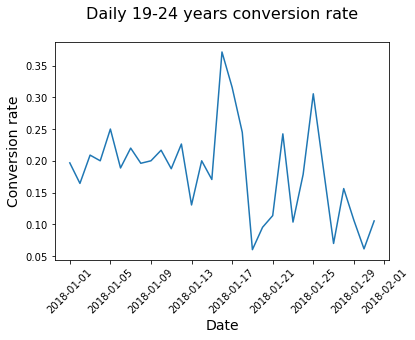

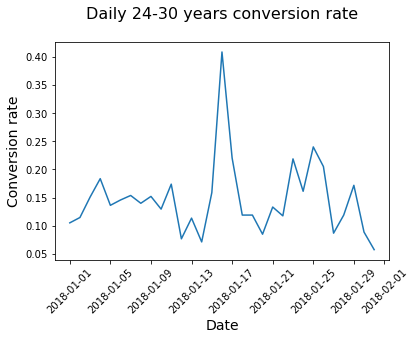

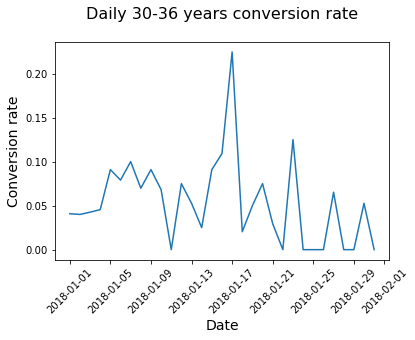

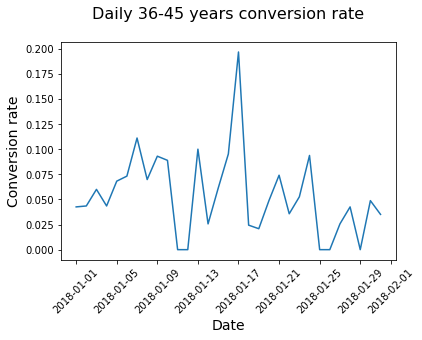

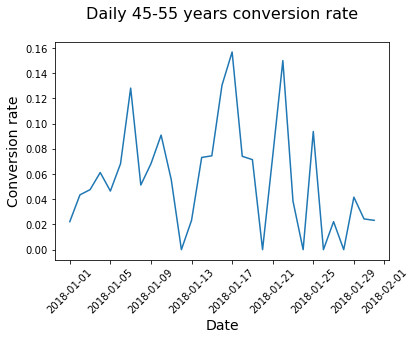

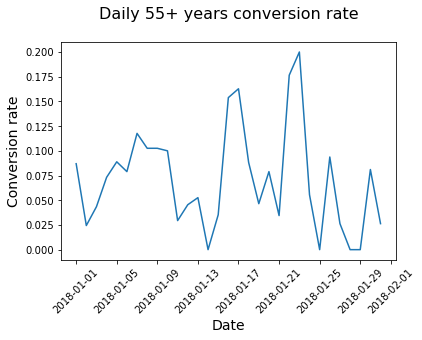

<Figure size 432x288 with 0 Axes>

In [114]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing,['date_served','age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

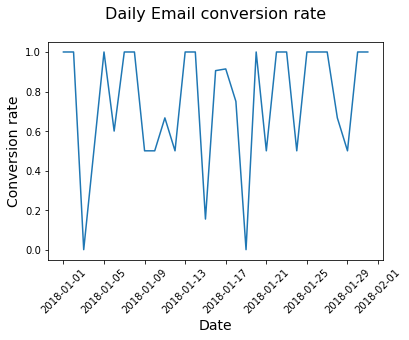

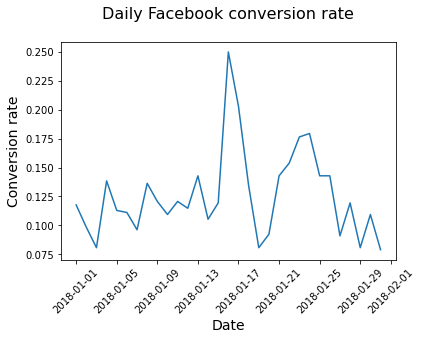

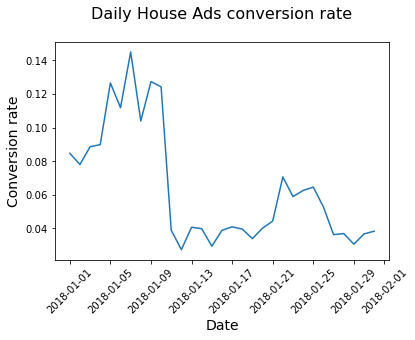

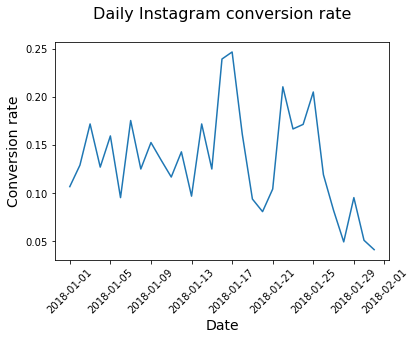

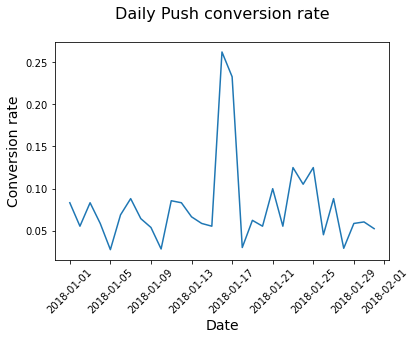

<Figure size 432x288 with 0 Axes>

In [115]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 
                                                 'marketing_channel'])

# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

# Plot results of daily_conv_channel
plotting_conv(daily_conv_channel)

**Analyzing House ads conversion rate**\
house ads conversion has been down since January 11\
It's vital to identify if the fluctuations are due to expected shifts in user behavior (i.e., differences across the day of the week) versus a larger problem in technical implementation or marketing strategy.\
we will begin by checking whether users are more likely to convert on weekends compared with weekdays and determine if that could be the cause for the changing house ads conversion rate.

In [116]:
# Add day of week column to marketing
marketing['DoW_served'] = marketing.date_served.dt.dayofweek

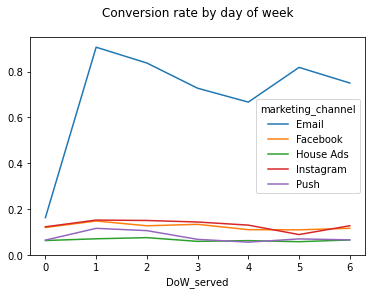

In [125]:
# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served', 'marketing_channel'])
# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

As you can see, email is particularly high and may be reflective of a tracking error, but house ads appear stable across the week with a slight peak on Tuesday

**House ads conversion by language** \
Now that you've ruled out natural fluctuations across the day of the week a user saw our marketing assets as they cause for decreasing house ads conversion, you will take a look at conversion by language over time.

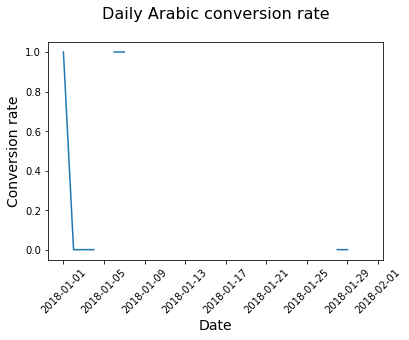

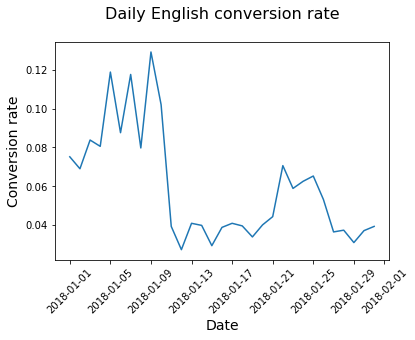

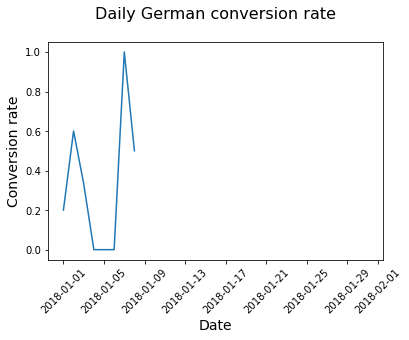

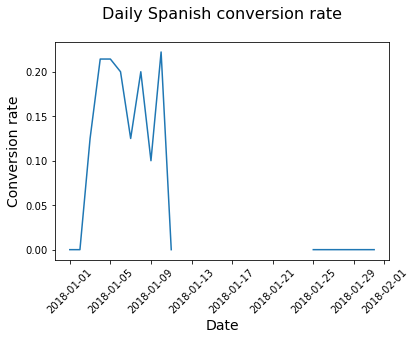

<Figure size 432x288 with 0 Axes>

In [126]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel']=='House Ads']

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads,['date_served','language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use your plotting function to display results
plotting_conv(conv_lang_df)

 As you can see, the English conversion rate drops around the 11th, and there do not appear to be ads served in other languages for a two week period.

In [127]:
house_ads.columns

Index(['user_id', 'date_served', 'marketing_channel', 'variant', 'converted',
       'language_displayed', 'language_preferred', 'age_group',
       'date_subscribed', 'date_canceled', 'subscribing_channel',
       'is_retained', 'channel_code', 'is_correct_lang', 'DoW', 'DoW_served'],
      dtype='object')

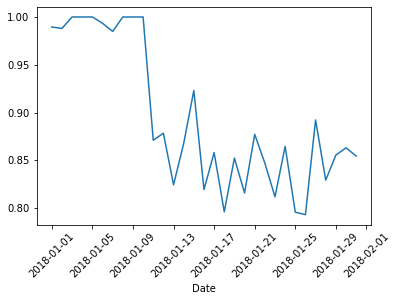

In [137]:
# Groupby date_served and correct_language
language_check = house_ads.groupby(['date_served','is_correct_lang'])['user_id'].count()
# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

# Plot and show your results
plt.plot(language_check_df.index.values,language_check_df['pct'])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.show()

You have shown that house ads have been underperforming due to serving all ads in English rather than each user's preferred language

In [138]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug,'language_displayed')

# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


Now that we've created indexes for each language compared with English, we can assess what conversion rate should have been during the rest of the month.

In [143]:
# Group house_ads by date and language
converted = house_ads.groupby(['date_served','language_preferred'])\
                        .agg({'user_id':'nunique',
                              'converted':'sum'})

# Unstack converted
converted = pd.DataFrame(converted.unstack(level=1))


user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   
2018-01-06             3.0   136.0    2.0    11.0         3      12      0   
2018-01-07             2.0   117.0    2.0    10.0         2      14      2   
2018-01-08             NaN   138.0    6.0    10.0       NaN      11      3   
2018-01-09             NaN   147.0    NaN    10.0       NaN      19    NaN   
2018-01-10             NaN   147.0    4.0    18.0       NaN      15      2   
2018-01-11             7.0   133.0    2.0    13.0         0       6      0   
2018-01-12             3.0   129.0    4.0    11.0         0       3      0   
2018-01-13             6.0   121.0    5.0    16.0         0       5      1   
2018-01-14             5.0   131.0    3.0    12.0         0       6      0   
2018-01-15             2.0   189.0    4.0    10.0         0       6      0   
2018-01-16             7.0   127.0    4.0    17.0         0       6      0   
2018-01-17             2.0   126.0    3.0    16.0         0       2      0   
2018-01-18             7.0   121.0    6.0    18.0         0       5      1   
2018-01-19             5.0   126.0    5.0    12.0         1       4      0   
2018-01-20             6.0   124.0    6.0    14.0         1       4      1   
2018-01-21             1.0    99.0    4.0     9.0     False       5      0   
2018-01-22             2.0    72.0    3.0     8.0         1       4      1   
2018-01-23             3.0    69.0    4.0     9.0         0       5      0   
2018-01-24             2.0    83.0    3.0     8.0         0       6      0   
2018-01-25             3.0    75.0    4.0    11.0         0       4      2   
2018-01-26             6.0    89.0    3.0    16.0         0       4      0   
2018-01-27             3.0   148.0    3.0    12.0         1       4      0   
2018-01-28             5.0   134.0    3.0    21.0         0       4      0   
2018-01-29             7.0   138.0    4.0    15.0         2       3      0   
2018-01-30             4.0   139.0    3.0    18.0         0       4      0   
2018-01-31             7.0   130.0    4.0    16.0         1       4      0   

                            
language_preferred Spanish  
date_served                 
2018-01-01               0  
2018-01-02               0  
2018-01-03               1  
2018-01-04               3  
2018-01-05               3  
2018-01-06               2  
2018-01-07               1  
2018-01-08               2  
2018-01-09               1  
2018-01-10               4  
2018-01-11               0  
2018-01-12               1  
2018-01-13               0  
2018-01-14               0  
2018-01-15               0  
2018-01-16               0  
2018-01-17               4  
2018-01-18               0  
2018-01-19               0  
2018-01-20               0  
2018-01-21               0  
2018-01-22               0  
2018-01-23               0  
2018-01-24               0  
2018-01-25               0  
2018-01-26               2  
2018-01-27               1  
2018-01-28               2  
2018-01-29               0  
2018-01-30               2  
2018-01-31               1

In [144]:
# Create English conversion rate column for affected period
converted['english_conv_rate'] = converted.loc['2018-01-11':'2018-01-31'][('converted','English')]

# Create expected conversion rates for each language
converted['expected_spanish_rate'] = converted['english_conv_rate']*spanish_index
converted['expected_arabic_rate'] = converted['english_conv_rate']*arabic_index
converted['expected_german_rate'] = converted['english_conv_rate']*german_index

# Multiply number of users by the expected conversion rate
converted['expected_spanish_conv'] = converted[('user_id','Spanish')]*converted['expected_spanish_rate']/100
converted['expected_arabic_conv'] = converted[('user_id','Arabic')]*converted['expected_arabic_rate']/100
converted['expected_german_conv'] =converted[('user_id','German')]*converted['expected_german_rate']/100

In [146]:
converted.head()

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   

                           english_conv_rate expected_spanish_rate  \
language_preferred Spanish                                           
date_served                                                          
2018-01-01               0               NaN                   NaN   
2018-01-02               0               NaN                   NaN   
2018-01-03               1               NaN                   NaN   
2018-01-04               3               NaN                   NaN   
2018-01-05               3               NaN                   NaN   

                   expected_arabic_rate expected_german_rate  \
language_preferred                                             
date_served                                                    
2018-01-01                          NaN                  NaN   
2018-01-02                          NaN                  NaN   
2018-01-03                          NaN                  NaN   
2018-01-04                          NaN                  NaN   
2018-01-05                          NaN                  NaN   

                   expected_spanish_conv expected_arabic_conv  \
language_preferred                                              
date_served                                                     
2018-01-01                           NaN                  NaN   
2018-01-02                           NaN                  NaN   
2018-01-03                           NaN                  NaN   
2018-01-04                           NaN                  NaN   
2018-01-05                           NaN                  NaN   

                   expected_german_conv  
language_preferred                       
date_served                              
2018-01-01                          NaN  
2018-01-02                          NaN  
2018-01-03                          NaN  
2018-01-04                          NaN  
2018-01-05                          NaN

In [147]:
# Use .loc to slice only the relevant dates
converted = converted.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted['expected_spanish_conv'].sum() + converted['expected_arabic_conv'].sum() + converted['expected_german_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted[('converted','Arabic')].sum() + converted[('converted','Spanish')].sum() + converted[('converted','German')].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs-actual_subs
print(lost_subs)

32.144143192488265


32 subscribers may not seem like many, but for a small company this can be vitally important, especially when expanding to new markets.

## A/B testing

The email portion of this campaign was actually run as an A/B test. Half the emails sent out were generic upsells to your product while the other half contained personalized messaging around the users’ usage of the site.

In [170]:
# Subset the DataFrame
email = marketing[marketing['marketing_channel']=='Email']
# Group the email DataFrame by variant 
alloc = email.groupby('variant')['user_id'].nunique()
alloc

variant
control            270
personalization    284
Name: user_id, dtype: int64

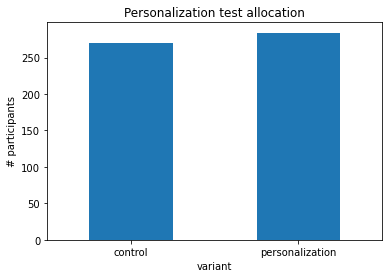

In [169]:
#plt.bar(alloc.index,alloc.values)
alloc.plot(kind='bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.xticks(rotation=0)
plt.show()

There's a slight difference in allocation, but it's within the expected range so you can continue with your analysis.

**Comparing Conversion rates**

Now that we know allocation is relatively even let's look at the conversion rate for the control and personalization. Since we chose conversion rate as our key metrics for this test, it is highly important that we evaluate whether or not conversion was higher in the personalization treatment compared with the control. While we will dive in deeper in subsequent exercises, measuring the difference between the key metric in the control and the treatment is the most important part of evaluating the success of an A/B test.

In [175]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 
                             'variant'])['converted'].max()

In [177]:
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

In [183]:
# Drop missing values from the control column
control = subscribers_df['control'].dropna()

In [186]:
np.mean(control)

0.2814814814814815

In [187]:
# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


**you can see that personalization converted users at a higher rate than the control.**

#### Calculating Lift 
Lift can be calculated by calculating the difference between the treatment effect (or the mean) of the treatment compared to the treatment effect of the control divided by the treatment effect of the control.\
Lift = (Treatment conversion rate - Control Conversion rate)/ Control Conversion rate

In [188]:
def lift(a,b):
    # Calcuate the mean of a and b
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean-a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'
  
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

38.85%


In [190]:
ttest_ind(control,personalization)

Ttest_indResult(statistic=-2.7343299447505074, pvalue=0.006451487844694175)

The personalization results are highly statistically significant.

In [191]:
np.unique(marketing.language_displayed.values)

array(['Arabic', 'English', 'German', 'Spanish'], dtype=object)

#### Building an A/B test segmenting function
personalization experiment is highly statistically significant. However, when running experiments, it is important to check how new features are affecting specific demographics. Sometimes features that are highly appealing to one group are less appealing to others.

Your function will take in a column name and run through each unique value in that column calculating lift and statistical significance.

In [205]:
def ab_segmentation(segment):
  # Build a for loop for each subsegment in marketing
  for subsegment in np.unique(marketing[segment]):
        print(subsegment)
      
      # Limit marketing to email and subsegment\
        email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]

     
    
        subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
        subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
        control = subscribers['control'].dropna()
        personalization = subscribers['personalization'].dropna()

        print('lift:', lift(control,personalization)) 
        print('t-statistic:', ttest_ind(control,personalization), '\n\n')

In [206]:
ab_segmentation('language_displayed')

Arabic
lift: 50.0%
t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 


English
lift: 39.0%
t-statistic: Ttest_indResult(statistic=-2.2183598646203166, pvalue=0.026991701290720815) 


German
lift: -1.62%
t-statistic: Ttest_indResult(statistic=0.1910083418078718, pvalue=0.8494394170062678) 


Spanish
lift: 166.67%
t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 




For personalisation results are highly significant in case of English and spanish

In [207]:
ab_segmentation('age_group')

0-18 years
lift: 121.4%
t-statistic: Ttest_indResult(statistic=-2.966044912142211, pvalue=0.0038724494391297226) 


19-24 years
lift: 106.24%
t-statistic: Ttest_indResult(statistic=-3.03179438478667, pvalue=0.0030623836114689134) 


24-30 years
lift: 161.19%
t-statistic: Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867337) 


30-36 years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.1859064644147996, pvalue=0.0023238487431765137) 


36-45 years
lift: -85.23%
t-statistic: Ttest_indResult(statistic=2.4317901279318503, pvalue=0.01797568600978829) 


45-55 years
lift: -72.22%
t-statistic: Ttest_indResult(statistic=2.065499127317933, pvalue=0.043062339688201196) 


55+ years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.3265654564203397, pvalue=0.0016358623456360435) 




personalization was extremely effective for younger groups but less effective than the control for older groups. One explanation might be that younger users understand how their data might be used online and think personalization is cool because it gives them more insight into themselves while older people might feel that this is a violation of their privacy.